## Midterm PHYS248/MATH248
March 2nd, 2018

Create a new directory in the top level of your own repo called `midterm`. Copy this midterm notebook into that new `midterm` directory and commit this initial version to your repo. Then keep adding answers to that notebook and commit occasionally to save your work. We will pull all repos at the end of the test and grade the version present in your repo at that time.

You may not ask the TAs any questions concerning the content of the exam. They are only allowed to help with any server or git issues.

You can use any course materials, your own past notes and work as well as any documentation of python tools that can be found on the internet. It is strictly prohibited that you communicate with anyone during the exam by any means.

### 1.1
Define the function $g(x) = a x^2 + bx +c$ for $a=-1/2$, $b=2$ and $c=1$  using the Python `lambda` construct.

In [137]:
g = lambda x: -0.5*x**2 + 2*x + 1

### 1.2
Plot the function in the interval $x \in [-2,3]$.

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [139]:
n = 100
x = linspace(-2, 3, n)
y = [g(x) for x in x]
#print(x)

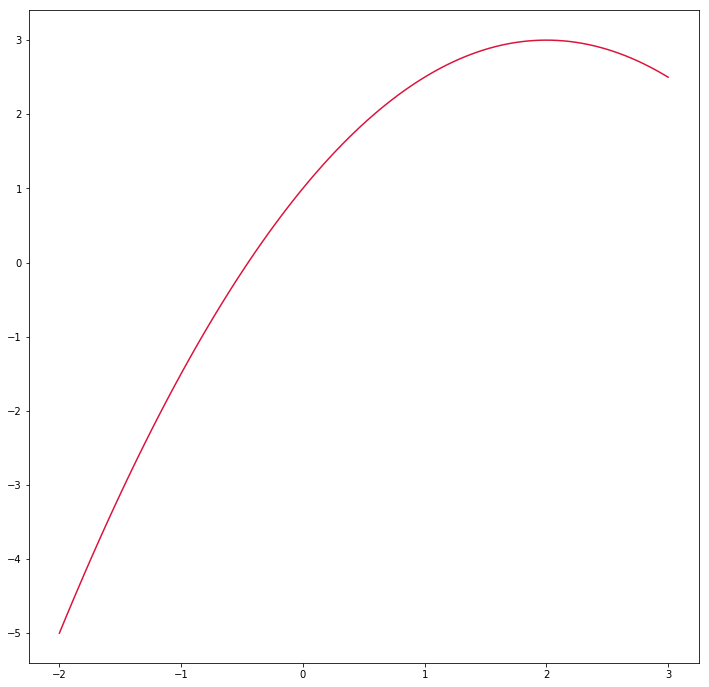

In [140]:
plt.figure(figsize = (12,12))
plt.plot(x,y,'-', color = 'crimson')

### 1.3
Devise and implement an algorithm that integrates $g$ in the given interval using the trapezoidal rule. 
1. Start by making a bar plot that demonstrates the integration method for dividing the integration interval into $n=4$ grid zones $\Delta x$ (Riemann sum for $n=4$).
2. Create a Pyhton function called `int_trap` that takes the function name to be integrated and an x array along which the integration is to be performed as an argument and returns the area under the curve. 

<Container object of 4 artists>

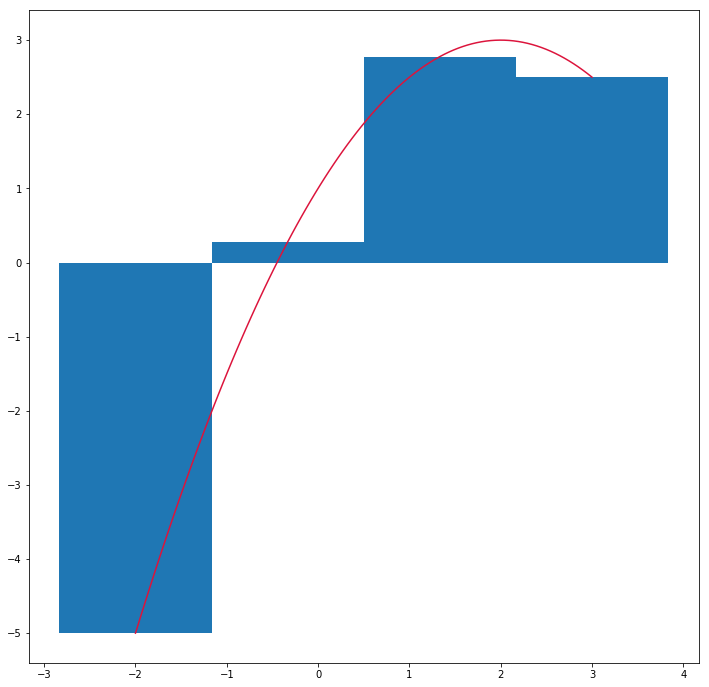

In [170]:
plt.figure(figsize = (12,12)) #so you can actually see the graph
plt.plot(x,y,'-', color = 'crimson') #curve for comparison
x1 = linspace(-2, 3, 4) # x values for bar plot, for FOUR grid zones
y1 = [g(x) for x in x1] # heights for bar plot
plt.bar(x1, y1, width = (1.6667)) #bar plot

In [171]:
def int_trap(f, xarray):
    '''
    function name: int_trap
        will take in paramters f (a function) and xarray (array of x values)
        will return the integrated area of the function under the array calculated via trapezoidal rule
    
    '''
    
    trapezoids = 0
    for i in xarray:
        h1=f(i)
        h2=f(i+1)
        trapezoids +=(((xarray[-1]-xarray[0])/len(xarray))*((h1+h2)/2))

    return (trapezoids)

In [176]:
print("\nthe integral of g(x) over [-2,3] via trapezoidal rule is: ", int_trap(g,x))
#int_trap(g,x)



the integral of g(x) over [-2,3] via trapezoidal rule is:  6.56144781145


### 1.4
Perform the same integral using a _scipy_ library.

In [114]:
import scipy.integrate as integrate

In [115]:
print("\nthe integral of g(x) over [-2,3] via scipy.integrate is: ", integrate.quad(g,-2,3))
#first value is the integral, second is the absolute error


the integral of g(x) over [-2,3] via scipy.integrate is:  (4.166666666666666, 1.256677553914146e-13)


### 1.5 
Perform the same integral using Sympy.  Print the antiderivative and evaluate the definite integral.


In [133]:
x = sp.Symbol('x')


sp.pprint(sp.integrate(-(1/2)*x**2 + 2*x + 1, x))

print("\nThe integral of g(x) over [-2,3] via sympy.integrate is: ",sp.integrate(-(1/2)*x**2 + 2*x + 1,(x,-2,3)))

                     3        2        
- 0.166666666666667⋅x  + 1.0⋅x  + 1.0⋅x

The integral of g(x) over [-2,3] via sympy.integrate is:  4.16666666666667


### 1.6
Comment on how the three solutions of performing this integral compare. If they are not the same comment on why this may be the case.

Answer: The Scipy and Sympy solutions are similar, which is good. My trapezoidal function is not. This is likely because of my own mistake in the function, but perhaps it's also because the the function goes to negative values, and the way python handles that is not the way I would have expected.

### 2.1
In the midterm directory you find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. The file contains two columns with the month number and the sunspot number.

Load the data and make a graph of sunspot number as a function of month.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set. 

Create a downsampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

### 2.2
Write a function called `run_av` that calculates the running average
$$
X_k = \frac{1}{2l+1} \sum_{m=k-l}^{k+l} x_{k+m}
$$ 
The function takes as argument the array and $l$. Create month and sunspot data arrays from the original data set for $l=30$. Plot this as well in the same plot as in 2.1.

### 2.3
Perform a spline interpolation of the down-sampled data and plot it using the original month data set as the x array. Set smoothing parameter s=1. Overplot into same figure as 2.1

 Do you recognize the 11-year solar cycle? (Not a graded question ;-)